In [0]:
from google.colab import drive
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/hackethon 2/data/train.csv'

file_path1 = '/content/drive/My Drive/hackethon 2/data/test.csv'

In [0]:
train = pd.read_csv(file_path)

In [5]:
train.shape

(7274, 3)

In [0]:
test = pd.read_csv(file_path1)

In [7]:
test.shape

(1819, 2)

In [8]:
combi = train.append(test,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
combi.head(5)

,sentiment,tweet,tweet_id
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701
1,1.0,Learning ab Google doodles! All doodles should...,1851
2,2.0,one of the most in-your-face ex. of stealing t...,2689
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525
4,1.0,Line outside the Apple store in Austin waiting...,3604


Table of Contents:

**Basic feature extraction using text data**

Number of words,
Number of characters,
Average word length,
Number of stopwords, Number of special characters,
Number of numerics,
Number of uppercase words.
 
**Basic Text Pre-processing of text data**

Lower casing,
Punctuation removal,
Stopwords removal,
Frequent words removal,
Rare words removal,
Spelling correction,
Tokenization,
Stemming,
Lemmatization.

**Advance Text Processing**

N-grams,
Term Frequency,
Inverse Document Frequency,
Term Frequency-Inverse Document Frequency (TF-IDF),
Bag of Words,
Sentiment Analysis,
Word Embedding.

In [0]:
combi['tweet_str']=combi['tweet'].astype(str)

In [11]:
"""import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

combi_clean = preprocess_reviews(combi['tweet_str'])"""



'import re\n\nREPLACE_NO_SPACE = re.compile("[.;:!\'?,"()\\[\\]]")\nREPLACE_WITH_SPACE = re.compile("(<br\\s*/><br\\s*/>)|(\\-)|(\\/)")\n\ndef preprocess_reviews(reviews):\n    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]\n    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]\n    \n    return reviews\n\ncombi_clean = preprocess_reviews(combi[\'tweet_str\'])'

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


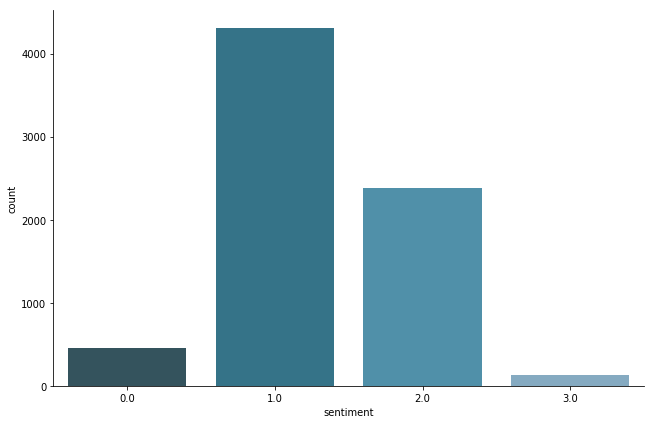

In [13]:
sns.factorplot(x="sentiment", data=combi, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

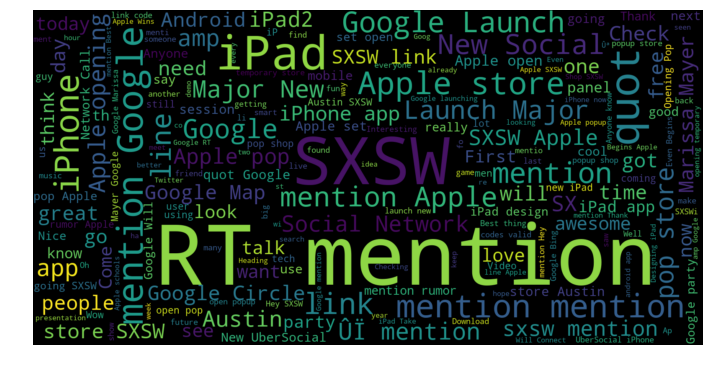

In [14]:
from wordcloud import WordCloud

text = combi['tweet'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Number of Words**

One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function in python:

In [15]:
combi['word_count'] = combi['tweet'].apply(lambda x: len(str(x).split(" ")))
combi[['tweet','word_count']].head(5)

,tweet,word_count
0,#sxswnui #sxsw #apple defining language of tou...,12
1,Learning ab Google doodles! All doodles should...,19
2,one of the most in-your-face ex. of stealing t...,23
3,This iPhone #SXSW app would b pretty awesome i...,19
4,Line outside the Apple store in Austin waiting...,15


#  Number of characters

This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet. This is done by calculating the length of the tweet.

In [16]:
combi['char_count'] = combi['tweet'].str.len() ## this also includes spaces
combi[['tweet','char_count']].head(5)

,tweet,char_count
0,#sxswnui #sxsw #apple defining language of tou...,89.0
1,Learning ab Google doodles! All doodles should...,143.0
2,one of the most in-your-face ex. of stealing t...,132.0
3,This iPhone #SXSW app would b pretty awesome i...,125.0
4,Line outside the Apple store in Austin waiting...,77.0


In [0]:
combi['tweet_str'] = combi['tweet'].astype(str)

# Average Word Length

In [18]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

combi['avg_word'] = combi['tweet_str'].apply(lambda x: avg_word(x))
combi[['tweet_str','avg_word']].head(5)

,tweet_str,avg_word
0,#sxswnui #sxsw #apple defining language of tou...,6.500000
1,Learning ab Google doodles! All doodles should...,6.578947
2,one of the most in-your-face ex. of stealing t...,5.000000
3,This iPhone #SXSW app would b pretty awesome i...,5.631579
4,Line outside the Apple store in Austin waiting...,4.500000


#Number of stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

combi['stopwords'] = combi['tweet_str'].apply(lambda x: len([x for x in x.split() if x in stop]))
combi[['tweet_str','stopwords']].head()

,tweet_str,stopwords
0,#sxswnui #sxsw #apple defining language of tou...,2
1,Learning ab Google doodles! All doodles should...,4
2,one of the most in-your-face ex. of stealing t...,7
3,This iPhone #SXSW app would b pretty awesome i...,4
4,Line outside the Apple store in Austin waiting...,4


#Number of special characters

One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [21]:
combi['hastags'] = combi['tweet_str'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
combi[['tweet_str','hastags']].head(5)

,tweet_str,hastags
0,#sxswnui #sxsw #apple defining language of tou...,3
1,Learning ab Google doodles! All doodles should...,2
2,one of the most in-your-face ex. of stealing t...,1
3,This iPhone #SXSW app would b pretty awesome i...,3
4,Line outside the Apple store in Austin waiting...,1


#Number of numerics

Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It does not have a lot of use in our example, but this is still a useful feature that should be run while doing similar exercises. For example, 

In [0]:
combi['numerics'] = combi['tweet_str'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
combi[['tweet_str','numerics']].head(5)

,tweet_str,numerics
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,0
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,0


In [0]:
combi['numerics'].value_counts()

0    7697
1    1257
2     122
3      15
5       1
4       1
Name: numerics, dtype: int64

#Basic Pre-processing

# Lower case

The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Sentiment’ and ‘sentiment’ will be taken as different words.

In [22]:
combi['tweet_str'] = combi['tweet_str'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combi['tweet_str'].head(5)

0    #sxswnui #sxsw #apple defining language of tou...
1    learning ab google doodles! all doodles should...
2    one of the most in-your-face ex. of stealing t...
3    this iphone #sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet_str, dtype: object

#Removing Punctuation

The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [23]:
combi['tweet_str'] = combi['tweet_str'].str.replace('[^\w\s]','')
combi['tweet_str'].head()

0    sxswnui sxsw apple defining language of touch ...
1    learning ab google doodles all doodles should ...
2    one of the most inyourface ex of stealing the ...
3    this iphone sxsw app would b pretty awesome if...
4    line outside the apple store in austin waiting...
Name: tweet_str, dtype: object

#Removal of Stop Words

As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
combi['tweet_str'] = combi['tweet_str'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combi['tweet_str'].head()

0    sxswnui sxsw apple defining language touch dif...
1    learning ab google doodles doodles light funny...
2    one inyourface ex stealing show yrs rt mention...
3    iphone sxsw app would b pretty awesome didnt c...
4    line outside apple store austin waiting new ip...
Name: tweet_str, dtype: object

#Common Word Removal

In [25]:
freq = pd.Series(' '.join(combi['tweet_str']).split()).value_counts()[:10]
freq

sxsw       9429
mention    6884
link       4284
rt         2929
ipad       2406
google     2337
apple      2143
iphone     1512
store      1467
new        1089
dtype: int64

In [26]:
freq 
combi['tweet1'] = combi['tweet_str'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
combi['tweet1'].head(5)

0    sxswnui defining language touch different dial...
1    learning ab doodles doodles light funny amp in...
2    one inyourface ex stealing show yrs quotat sch...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet1, dtype: object

In [0]:
#freq2= pd.Series(' '.join(train['tweet1']).split()).value_counts()[:10]
#Checking if common words have removed

In [0]:

#for i in freq:
  #print(i)
 # train['tr1']=train['tweet_str'].replace(""+i," ")
#train['tweet_str1']

#Rare words removal

In [29]:
freq1 = pd.Series(' '.join(combi['tweet1']).split()).value_counts()[-10:]
freq1

wbeing          1
rimhp           1
netscape        1
äá              1
1240            1
respectfully    1
joomla          1
knowquot        1
autographs      1
connecting      1
dtype: int64

In [31]:
combi['tweet2'] = combi['tweet1'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
combi['tweet2'].head(5)

0    sxswnui defining language touch different dial...
1    learning ab doodles doodles light funny amp in...
2    one inyourface ex stealing show yrs quotat sch...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet2, dtype: object

In [32]:
combi.head(5)

,sentiment,tweet,tweet_id,tweet_str,word_count,char_count,avg_word,stopwords,hastags,tweet1,tweet2
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,sxswnui sxsw apple defining language touch dif...,12,89.0,6.500000,2,3,sxswnui defining language touch different dial...,sxswnui defining language touch different dial...
1,1.0,Learning ab Google doodles! All doodles should...,1851,learning ab google doodles doodles light funny...,19,143.0,6.578947,4,2,learning ab doodles doodles light funny amp in...,learning ab doodles doodles light funny amp in...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one inyourface ex stealing show yrs rt mention...,23,132.0,5.000000,7,1,one inyourface ex stealing show yrs quotat sch...,one inyourface ex stealing show yrs quotat sch...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,iphone sxsw app would b pretty awesome didnt c...,19,125.0,5.631579,4,3,app would b pretty awesome didnt crash every 1...,app would b pretty awesome didnt crash every 1...
4,1.0,Line outside the Apple store in Austin waiting...,3604,line outside apple store austin waiting new ip...,15,77.0,4.500000,4,1,line outside austin waiting,line outside austin waiting


#Spelling correction

We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library. 

In [33]:
from textblob import TextBlob
combi['tweet2'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    sxswnui defining language touch different dial...
1    learning ab doubles doubles light funny amp in...
2    one inyourface ex stealing show yes quotas sch...
3    pp would b pretty awesome didn crash every 10m...
4                          line outside austin waiting
Name: tweet2, dtype: object

#Tokenization

Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [34]:
TextBlob(combi['tweet2'][1]).words

WordList(['learning', 'ab', 'doodles', 'doodles', 'light', 'funny', 'amp', 'innovative', 'exceptions', 'significant', 'occasions', 'googledoodle'])

In [35]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#Lemmatization

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [36]:
from textblob import Word
combi['tweet3'] = combi['tweet2'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
combi['tweet3'].head()

0    sxswnui defining language touch different dial...
1    learning ab doodle doodle light funny amp inno...
2    one inyourface ex stealing show yr quotat scho...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet3, dtype: object

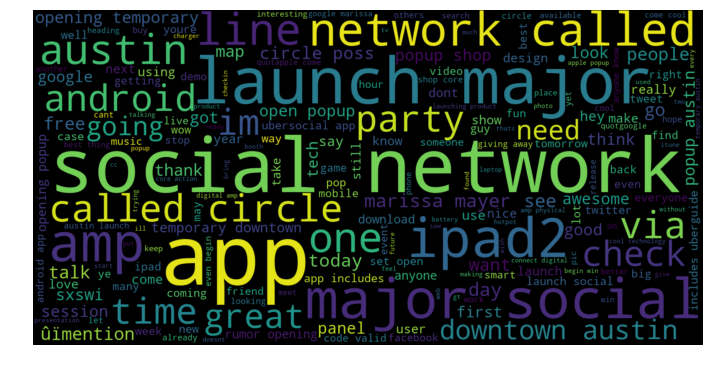

In [37]:
from wordcloud import WordCloud

text = combi['tweet3'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

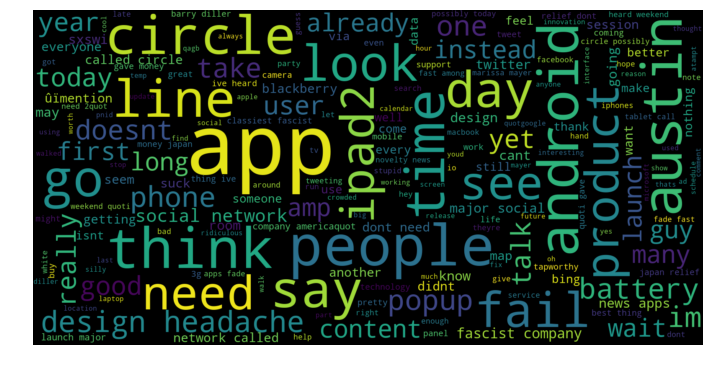

In [39]:
neg_tweets = combi[combi.sentiment == 0  ]
neg_string = []
for t in neg_tweets.tweet3:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

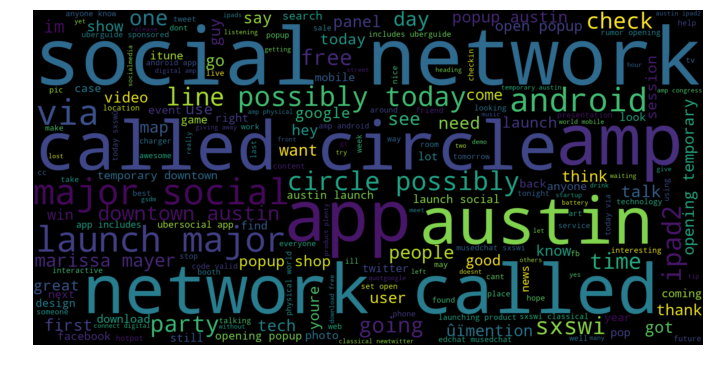

In [40]:
neu_tweets = combi[combi.sentiment == 1  ]
neu_string = []
for t in neu_tweets.tweet3:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')


from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

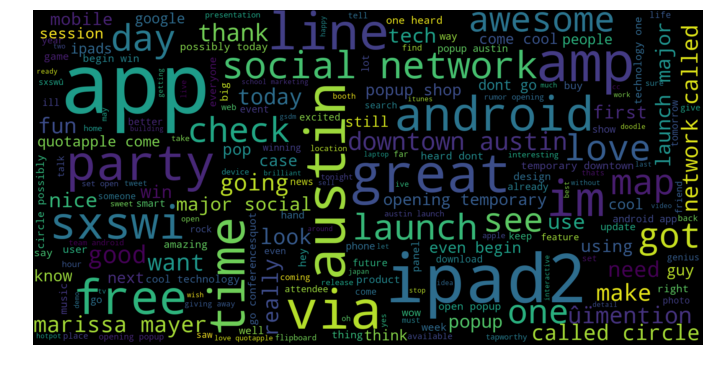

In [41]:
p_tweets = combi[combi.sentiment == 2  ]
p_string = []
for t in p_tweets.tweet3:
    p_string.append(t)
p_string = pd.Series(p_string).str.cat(sep=' ')


from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(p_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

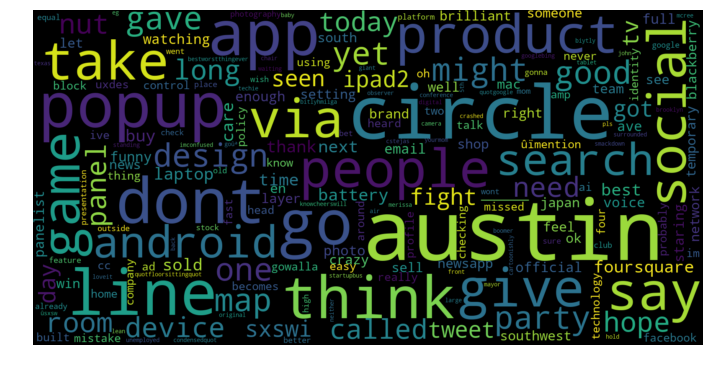

In [0]:
c_tweets = combi[combi.sentiment == 3  ]
c_string = []
for t in c_tweets.tweet3:
    c_string.append(t)
c_string = pd.Series(c_string).str.cat(sep=' ')


from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(c_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [0]:
def expand_contractions(text, contraction_mapping=contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [0]:
combi['clean_text'] = [expand_contractions(t) for t in combi.tweet3]

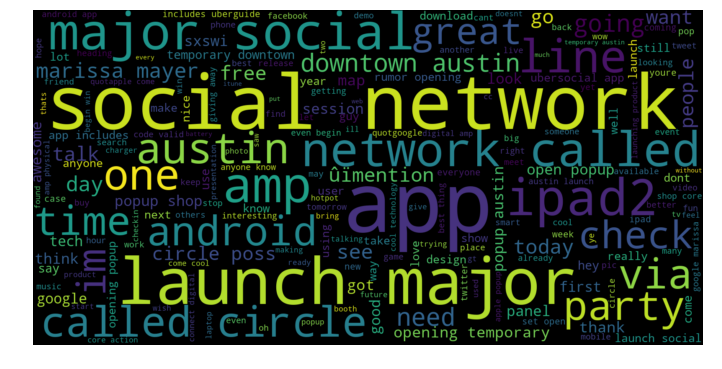

In [0]:
from wordcloud import WordCloud

text = combi['clean_text'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
import unicodedata

In [0]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


In [0]:
combi['clean_text1'] = [remove_accented_chars(t) for t in combi.clean_text]

In [0]:
combi['clean_text2'] = [expand_contractions(t) for t in combi.clean_text1]

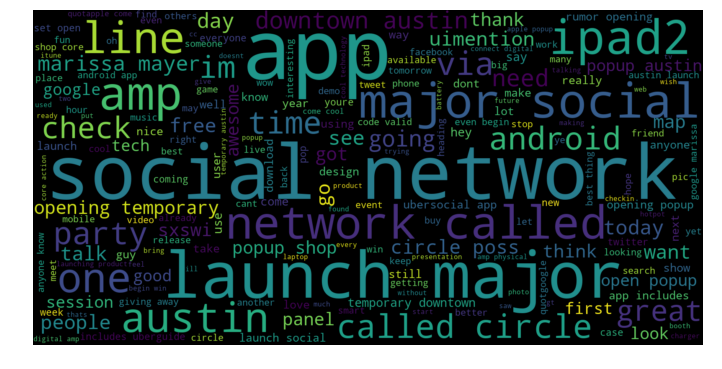

In [0]:
from wordcloud import WordCloud

text = combi['clean_text2'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
k_=TextBlob(combi['clean_text2'][0]).ngrams(2)
type(k_)

list

In [0]:
tf1 = (combi['clean_text2'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,doodle,2
1,exception,1
2,occasion,1
3,funny,1
4,significant,1
5,light,1
6,ab,1
7,amp,1
8,googledoodle,1
9,learning,1


In [0]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(combi.shape[0]/(len(combi[combi['clean_text2'].str.contains(word)])))

tf1

,words,tf,idf
0,doodle,2,5.559912
1,exception,1,7.728966
2,occasion,1,7.728966
3,funny,1,5.896384
4,significant,1,9.115260
5,light,1,4.733234
6,ab,1,2.785539
7,amp,1,2.346767
8,googledoodle,1,6.224888
9,learning,1,6.282047


In [0]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,doodle,2,5.559912,11.119824
1,exception,1,7.728966,7.728966
2,occasion,1,7.728966,7.728966
3,funny,1,5.896384,5.896384
4,significant,1,9.115260,9.115260
5,light,1,4.733234,4.733234
6,ab,1,2.785539,2.785539
7,amp,1,2.346767,2.346767
8,googledoodle,1,6.224888,6.224888
9,learning,1,6.282047,6.282047


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(combi['clean_text2'])



In [0]:
train_vect

<9093x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 47146 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(combi['clean_text2'])
train_bow

<9093x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 51948 stored elements in Compressed Sparse Row format>

In [0]:
combi['clean_text2'][:5].apply(lambda x: TextBlob(x).sentiment)

0          (0.15, 0.65)
1    (0.38125, 0.89375)
2            (0.0, 0.0)
3          (0.625, 1.0)
4           (0.0, 0.05)
Name: clean_text2, dtype: object

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from negative tweets

HT_negative = hashtag_extract(combi['clean_text2'][combi['sentiment'] == 0])

# extracting hashtags from neutral tweets
HT_neutral = hashtag_extract(combi['clean_text2'][combi['sentiment'] == 1])

# extracting hashtags from neutral tweets
HT_positive = hashtag_extract(combi['clean_text2'][combi['sentiment'] == 2])
                                                                                               
# extracting hashtags from neutral tweets
HT_cantsay = hashtag_extract(combi['clean_text2'][combi['sentiment'] == 3])
# unnesting listHashtag

HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])  
HT_positive = sum(HT_positive,[])
HT_cantsay = sum(HT_cantsay,[])
                                                

In [0]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.factorplot(data=combi, x = "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: ignored

<Figure size 1152x360 with 0 Axes>

https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/